In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
with open('resultados_consolidados.pickle', "rb") as handle:
    results = pickle.load(handle)

In [15]:
df_metric = pd.concat([
    # 1 day
    pd.DataFrame(
        {
            'experiment' : '1_day',
            'model': ['decision_tree_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['decision_tree_regressor']['with_features']['1_day']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '1_day',
            'model': ['decision_tree_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['decision_tree_regressor']['wo_features']['1_day']['metrics']['rmse']]        
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '1_day',
            'model': ['random_forest_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['random_forest_regressor']['with_features']['1_day']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '1_day',
            'model': ['random_forest_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['random_forest_regressor']['wo_features']['1_day']['metrics']['rmse']]        
        }
    ),

    # 7 days
    pd.DataFrame(
        {
            'experiment' : '7_days',
            'model': ['decision_tree_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['decision_tree_regressor']['with_features']['7_days']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '7_days',
            'model': ['decision_tree_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['decision_tree_regressor']['wo_features']['7_days']['metrics']['rmse']]        
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '7_days',
            'model': ['random_forest_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['random_forest_regressor']['with_features']['7_days']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '7_days',
            'model': ['random_forest_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['random_forest_regressor']['wo_features']['7_days']['metrics']['rmse']]        
        }
    ),

    # 14 days
    pd.DataFrame(
        {
            'experiment' : '14_days',
            'model': ['decision_tree_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['decision_tree_regressor']['with_features']['14_days']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '14_days',
            'model': ['decision_tree_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['decision_tree_regressor']['wo_features']['14_days']['metrics']['rmse']]        
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '14_days',
            'model': ['random_forest_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['random_forest_regressor']['with_features']['14_days']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '14_days',
            'model': ['random_forest_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['random_forest_regressor']['wo_features']['14_days']['metrics']['rmse']]        
        }
    ),

    # 28 days
    pd.DataFrame(
        {
            'experiment' : '28_days',
            'model': ['decision_tree_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['decision_tree_regressor']['with_features']['28_days']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '28_days',
            'model': ['decision_tree_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['decision_tree_regressor']['wo_features']['28_days']['metrics']['rmse']]        
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '28_days',
            'model': ['random_forest_regressor'],
            'model_type': ['with_features'],
            'rmse': [results['random_forest_regressor']['with_features']['28_days']['metrics']['rmse']]
        }
    ),
    pd.DataFrame(
        {
            'experiment' : '28_days',
            'model': ['random_forest_regressor'],
            'model_type': ['wo_features'],
            'rmse': [results['random_forest_regressor']['wo_features']['28_days']['metrics']['rmse']]        
        }
    ),    

])

In [18]:
df_metric[df_metric['experiment'] == '28_days']

,experiment,model,model_type,rmse
0,28_days,decision_tree_regressor,with_features,3.1830
0,28_days,decision_tree_regressor,wo_features,5.0833
0,28_days,random_forest_regressor,with_features,3.0162
0,28_days,random_forest_regressor,wo_features,4.5673


---

In [4]:
df_1_day = pd.DataFrame(results['decision_tree_regressor']['with_features']['1_day']['data'])
df_1_day.rename(columns={'predicted': 'decision_tree_regressor_with_features'}, inplace=True)
print(df_1_day.shape)

df_1_day = df_1_day.merge(
    pd.DataFrame(results['decision_tree_regressor']['wo_features']['1_day']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_1_day.rename(columns={'predicted': 'decision_tree_regressor_wo_features'}, inplace=True)
print(df_1_day.shape)

df_1_day = df_1_day.merge(
    pd.DataFrame(results['random_forest_regressor']['with_features']['1_day']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_1_day.rename(columns={'predicted': 'random_forest_regressor_with_features'}, inplace=True)
print(df_1_day.shape)

df_1_day = df_1_day.merge(
    pd.DataFrame(results['random_forest_regressor']['wo_features']['1_day']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_1_day.rename(columns={'predicted': 'random_forest_regressor_wo_features'}, inplace=True)
print(df_1_day.shape)

(90, 4)
(90, 5)
(90, 6)
(90, 7)


In [5]:
df_1_day.head()

,ticker,date,close,decision_tree_regressor_with_features,decision_tree_regressor_wo_features,random_forest_regressor_with_features,random_forest_regressor_wo_features
0,AALR3,2021-05-19,10.86,10.36,10.36,10.1990,10.1799
1,ABEV3,2021-05-19,17.56,17.42,17.42,17.3481,17.3696
2,AFLT3,2021-05-19,9.30,9.18,9.18,9.1863,9.2541
3,AGRO3,2021-05-19,31.60,32.20,32.20,32.2954,32.3144
4,ALPA3,2021-05-19,39.33,39.83,39.83,39.7758,39.9984


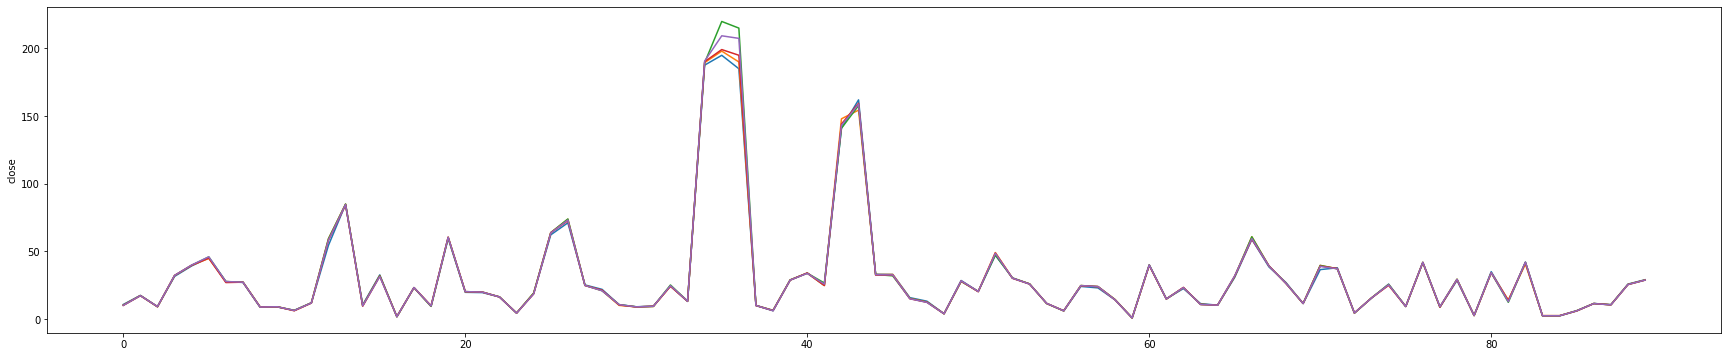

In [6]:
fig, ax = plt.subplots(figsize=(30, 6))

x = [_ for _ in range(len(df_1_day))]

sns.lineplot(data=df_1_day, x=x, y='close')
ax.plot(df_1_day['decision_tree_regressor_with_features'])
ax.plot(df_1_day['decision_tree_regressor_wo_features'])
ax.plot(df_1_day['random_forest_regressor_with_features'])
ax.plot(df_1_day['random_forest_regressor_wo_features'])

---

In [24]:
df_28_days = pd.DataFrame(results['decision_tree_regressor']['with_features']['28_days']['data'])
df_28_days.rename(columns={'predicted': 'decision_tree_regressor_with_features'}, inplace=True)
print(df_28_days.shape)

df_28_days = df_28_days.merge(
    pd.DataFrame(results['decision_tree_regressor']['wo_features']['28_days']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_28_days.rename(columns={'predicted': 'decision_tree_regressor_wo_features'}, inplace=True)
print(df_28_days.shape)

df_28_days = df_28_days.merge(
    pd.DataFrame(results['random_forest_regressor']['with_features']['28_days']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_28_days.rename(columns={'predicted': 'random_forest_regressor_with_features'}, inplace=True)
print(df_28_days.shape)

df_28_days = df_28_days.merge(
    pd.DataFrame(results['random_forest_regressor']['wo_features']['28_days']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_28_days.rename(columns={'predicted': 'random_forest_regressor_wo_features'}, inplace=True)
print(df_28_days.shape)

(2483, 4)
(2483, 5)
(2483, 6)
(2483, 7)


In [21]:
df_28_days[df_28_days['ticker'] == 'AALR3']

,ticker,date,close,decision_tree_regressor_with_features,decision_tree_regressor_wo_features,random_forest_regressor_with_features,random_forest_regressor_wo_features
0,AALR3,2021-05-19,10.86,10.36,10.36,10.1990,10.1799
1,AALR3,2021-05-20,11.51,10.36,10.36,10.1789,10.1809
2,AALR3,2021-05-21,11.19,10.36,10.36,10.1763,10.1592
3,AALR3,2021-05-24,10.55,10.36,10.36,10.1803,9.8925
4,AALR3,2021-05-25,10.97,10.36,10.36,10.2010,9.8238
5,AALR3,2021-05-26,10.78,10.36,10.36,10.1852,9.8436
6,AALR3,2021-05-27,11.90,10.36,10.36,10.1589,9.7905
7,AALR3,2021-05-28,11.43,10.36,10.36,10.1589,9.7547
8,AALR3,2021-05-31,12.27,10.36,10.36,10.1598,9.7073
9,AALR3,2021-06-01,12.75,9.95,8.84,10.1137,8.9090


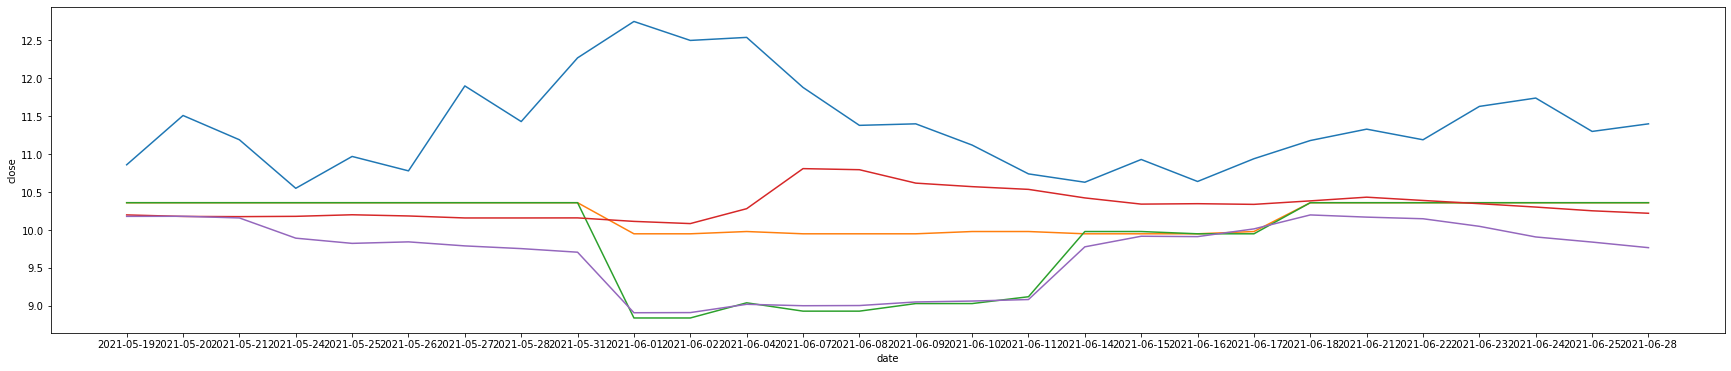

In [27]:
tmp = df_28_days[df_28_days['ticker'] == 'AALR3'].copy()
tmp['date'] = tmp['date'].dt.strftime('%Y-%m-%d')

fig, ax = plt.subplots(figsize=(30, 6))

x = [_ for _ in range(len(tmp))]

sns.lineplot(x=tmp['date'], y=tmp['close'])
ax.plot(tmp['decision_tree_regressor_with_features'])
ax.plot(tmp['decision_tree_regressor_wo_features'])
ax.plot(tmp['random_forest_regressor_with_features'])
ax.plot(tmp['random_forest_regressor_wo_features'])

In [28]:
tmp

,ticker,date,close,decision_tree_regressor_with_features,decision_tree_regressor_wo_features,random_forest_regressor_with_features,random_forest_regressor_wo_features
0,AALR3,2021-05-19,10.86,10.36,10.36,10.1990,10.1799
1,AALR3,2021-05-20,11.51,10.36,10.36,10.1789,10.1809
2,AALR3,2021-05-21,11.19,10.36,10.36,10.1763,10.1592
3,AALR3,2021-05-24,10.55,10.36,10.36,10.1803,9.8925
4,AALR3,2021-05-25,10.97,10.36,10.36,10.2010,9.8238
5,AALR3,2021-05-26,10.78,10.36,10.36,10.1852,9.8436
6,AALR3,2021-05-27,11.90,10.36,10.36,10.1589,9.7905
7,AALR3,2021-05-28,11.43,10.36,10.36,10.1589,9.7547
8,AALR3,2021-05-31,12.27,10.36,10.36,10.1598,9.7073
9,AALR3,2021-06-01,12.75,9.95,8.84,10.1137,8.9090


---